## Predicting Stock Prices with Linear Regression in Python

### Step 1: Get Historic Pricing Data

In [1]:
import pandas as pd

# Load local .csv file as DataFrame
df = pd.read_csv('TSLA.csv')

In [2]:
# Inspect the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-17,779.090027,799.840027,762.010010,798.150024,798.150024,25996500
1,2021-02-18,780.900024,794.690002,776.270020,787.380005,787.380005,17957100
2,2021-02-19,795.000000,796.789978,777.369995,781.299988,781.299988,18958300
3,2021-02-22,762.640015,768.500000,710.200012,714.500000,714.500000,37269700
4,2021-02-23,662.130005,713.609985,619.000000,698.840027,698.840027,66606900
...,...,...,...,...,...,...,...
250,2022-02-11,909.630005,915.960022,850.700012,860.000000,860.000000,26492700
251,2022-02-14,861.570007,898.880005,853.150024,875.760010,875.760010,22515100
252,2022-02-15,900.000000,923.000000,893.380005,922.429993,922.429993,19216500
253,2022-02-16,914.049988,926.429993,901.210022,923.390015,923.390015,17098100


In [3]:
# Show some summary statistics
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,255.000000,255.000000,255.000000,255.000000,255.000000,2.550000e+02
mean,799.086353,816.197174,779.948669,798.349802,798.349802,2.695229e+07
std,175.172472,181.032651,168.269068,174.737475,174.737475,1.137622e+07
min,552.549988,566.210022,539.489990,563.000000,563.000000,9.800600e+06
25%,670.375000,684.649994,652.420013,668.299988,668.299988,1.887580e+07
50%,728.650024,741.989990,714.340027,732.229980,732.229980,2.456090e+07
75%,925.984985,945.040009,902.960022,930.625000,930.625000,3.183860e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,8.939650e+07


### Step 2: Prepare the data

In [4]:
# Reindex data using a DatetimeIndex
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)

# Keep only the 'Adj Close' Value
df = df.loc[:, ['Adj Close']]

In [5]:
# Re-inspect data
df

,Adj Close
Date,
2021-02-17,798.150024
2021-02-18,787.380005
2021-02-19,781.299988
2021-02-22,714.500000
2021-02-23,698.840027
...,...
2022-02-11,860.000000
2022-02-14,875.760010
2022-02-15,922.429993


In [6]:
# Print Info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2021-02-17 to 2022-02-17
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  255 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


<AxesSubplot:xlabel='Date'>

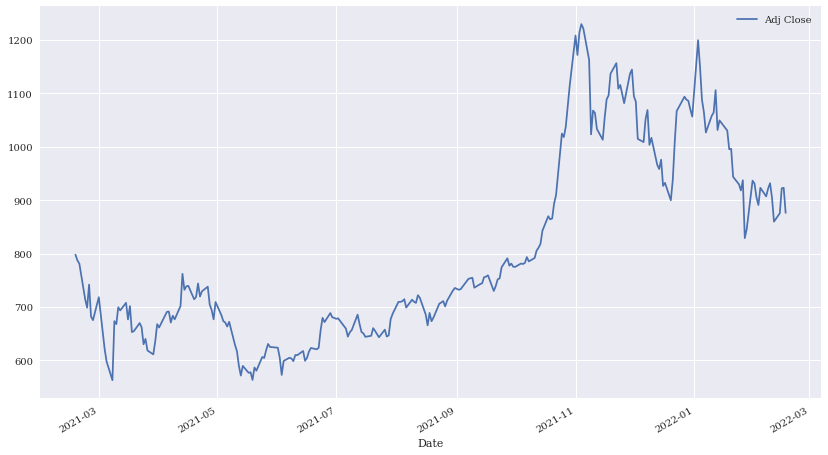

In [7]:
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
df.plot(figsize=(14, 8))

### Step 3: Adding Technical Indicators

In [8]:
import pandas_ta

# Add EMA to dataframe by appending
# Note: pandas_ta integrates seamlessly into
# our existing dataframe
df.ta.ema(close='Adj Close', length=10, append=True)

Date
2021-02-17           NaN
2021-02-18           NaN
2021-02-19           NaN
2021-02-22           NaN
2021-02-23           NaN
                 ...    
2022-02-11    908.052142
2022-02-14    902.180846
2022-02-15    905.862509
2022-02-16    909.049328
2022-02-17    903.103991
Name: EMA_10, Length: 255, dtype: float64

In [9]:
# Inspect Data once again
df

,Adj Close,EMA_10
Date,,
2021-02-17,798.150024,NaN
2021-02-18,787.380005,NaN
2021-02-19,781.299988,NaN
2021-02-22,714.500000,NaN
2021-02-23,698.840027,NaN
...,...,...
2022-02-11,860.000000,908.052142
2022-02-14,875.760010,902.180846
2022-02-15,922.429993,905.862509


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2021-02-17 to 2022-02-17
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  255 non-null    float64
 1   EMA_10     246 non-null    float64
dtypes: float64(2)
memory usage: 6.0 KB


In [11]:
# Print the first 10 entries of our data
df.head(10)

,Adj Close,EMA_10
Date,,
2021-02-17,798.150024,NaN
2021-02-18,787.380005,NaN
2021-02-19,781.299988,NaN
2021-02-22,714.500000,NaN
2021-02-23,698.840027,NaN
2021-02-24,742.020020,NaN
2021-02-25,682.219971,NaN
2021-02-26,675.500000,NaN
2021-03-01,718.429993,NaN


In [12]:
# Drop the first n-rows
df = df.iloc[9:]

# View our newly-formed dataset
df.head(10)

,Adj Close,EMA_10
Date,,
2021-03-02,686.440002,728.478003
2021-03-03,653.200012,714.791096
2021-03-04,621.440002,697.818169
2021-03-05,597.950012,679.660323
2021-03-08,563.000000,658.449355
2021-03-09,673.580017,661.200384
2021-03-10,668.059998,662.447587
2021-03-11,699.599976,669.202567
2021-03-12,693.729980,673.662096


<AxesSubplot:xlabel='Date'>

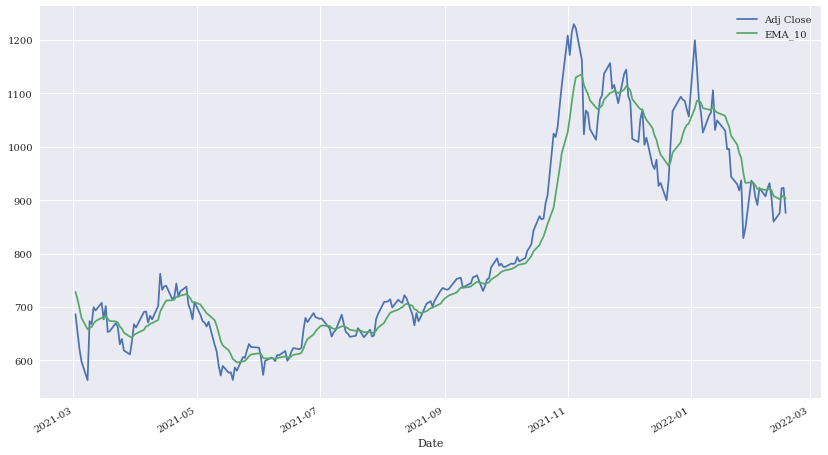

In [13]:
df.plot(figsize=(14, 8))

### Step 4: Test-Train Split

In [14]:
from sklearn.model_selection import train_test_split

# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df[['Adj Close']], df[['EMA_10']], test_size=.2)

In [15]:
# Test set
X_test.describe()

,Adj Close
count,50.000000
mean,794.115798
std,177.142001
min,563.460022
25%,662.509994
50%,712.339996
75%,932.427505
max,1213.859985


In [16]:
# Training set
X_train.describe()

,Adj Close
count,196.000000
mean,802.423825
std,177.709240
min,563.000000
25%,667.375000
50%,736.959992
75%,932.617493
max,1229.910034


### Step 5: Training the Model

In [17]:
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

### Step 6: Validating the Fit

In [18]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.92925208]]
Mean Absolute Error: 27.017451513341392
Coefficient of Determination: 0.959995790051001
